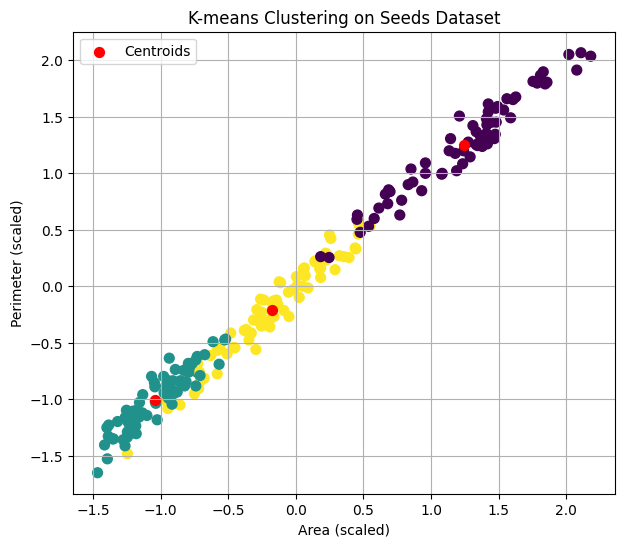

In [1]:
# ================================
# K-means clustering on the Seeds dataset
# ================================

import pandas as pd
import numpy as np
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt

# -------------------------------
# Load Seeds dataset
# -------------------------------
url = "https://archive.ics.uci.edu/ml/machine-learning-databases/00236/seeds_dataset.txt"
column_names = [
    "area", "perimeter", "compactness", "length_kernel",
    "width_kernel", "asymmetry", "length_groove", "class"
]
seeds = pd.read_csv(url, sep=r"\s+", names=column_names)

# -------------------------------
# Only numeric features
# -------------------------------
X = seeds.iloc[:, :-1].values  

# -------------------------------
# Standardize features
# -------------------------------
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# -------------------------------
# Fit K-means without labels
# -------------------------------
k = 3
kmeans = KMeans(n_clusters=k, random_state=42)
clusters = kmeans.fit_predict(X_scaled)

# -------------------------------
# Visualize clusters (first two features)
# -------------------------------
plt.figure(figsize=(7,6))
plt.scatter(X_scaled[:,0], X_scaled[:,1], c=clusters, cmap='viridis', s=50)
plt.scatter(kmeans.cluster_centers_[:,0], kmeans.cluster_centers_[:,1],
            c='red', marker='.', s=200, label='Centroids')
plt.xlabel('Area (scaled)')
plt.ylabel('Perimeter (scaled)')
plt.title('K-means Clustering on Seeds Dataset')
plt.grid(True)
plt.legend()
plt.savefig('img/seed_kMeansClustering.png')  # optional save
plt.show()


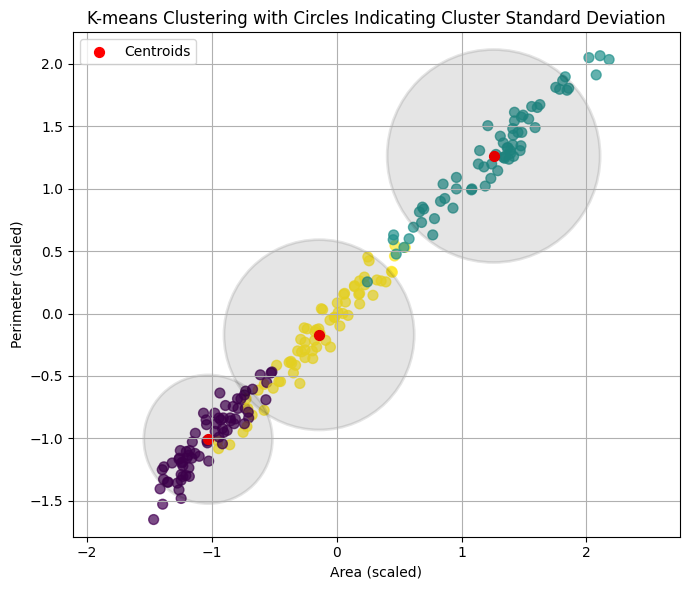

In [7]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt
import matplotlib.patches as patches

# -------------------------------
# Load and preprocess Seeds dataset
# -------------------------------
url = "https://archive.ics.uci.edu/ml/machine-learning-databases/00236/seeds_dataset.txt"

column_names = [
    "area", "perimeter", "compactness", "length_kernel",
    "width_kernel", "asymmetry", "length_groove", "class"
]
seeds = pd.read_csv(url, sep=r"\s+", names=column_names)

# Use only numerical features
X = seeds.iloc[:, :-1].values

# Standardise features
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# -------------------------------
# Fit K-means
# -------------------------------
k = 3
kmeans = KMeans(n_clusters=k, random_state=42, n_init=10)
clusters = kmeans.fit_predict(X_scaled)
centroids = kmeans.cluster_centers_

# -------------------------------
# Compute radii from within-cluster standard deviation
# -------------------------------
X_plot = X_scaled[:, :2]     # First two features for visualisation
cluster_radii = []

for i in range(k):
    cluster_points = X_plot[clusters == i]
    std_x = np.std(cluster_points[:, 0])
    std_y = np.std(cluster_points[:, 1])
    radius = 2 * (std_x + std_y) / 2   # Twice the average within-cluster SD
    cluster_radii.append(radius)

# -------------------------------
# Visualise clustering
# -------------------------------
fig, ax = plt.subplots(figsize=(7,6))

ax.scatter(X_plot[:,0], X_plot[:,1], c=clusters, cmap='viridis', s=50, alpha=0.7)
ax.scatter(centroids[:,0], centroids[:,1], c='red', marker='.', s=200, label='Centroids')

# Draw circles representing cluster spread
for (cx, cy), r in zip(centroids[:, :2], cluster_radii):
    circle = patches.Circle((cx, cy), r, color='black', fill=True, alpha=0.1, lw=2)
    ax.add_patch(circle)

ax.set_aspect('equal', adjustable='datalim')

plt.xlabel('Area (scaled)')
plt.ylabel('Perimeter (scaled)')
plt.title('K-means Clustering with Circles Indicating Cluster Standard Deviation')
plt.grid(True)
plt.legend()
plt.tight_layout()
plt.savefig('img/seed_kMeansClustering_with_dynamic_circles.png')
plt.show()
